<a href="https://colab.research.google.com/github/skarthi369/property-insurance-prediction/blob/main/Property_Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
from google.colab import files

#uploaded = files.upload()

# Loading Dataset

In [6]:
import pandas as pd # Import pandas library with alias pd
data = pd.read_csv('home_insurance_dataset.csv')

# Dataset Exploration

In [7]:
data.head()

,ID,POLICY_NUM,QUOTE_DATE,COVER_START,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,...,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,PAYMENT_METHOD,PAYMENT_FREQUENCY,ANNUAL_PREMIUM
0,1,P000001,11/22/2007,22-11-2007,R,N,Y,19.0,1000000.0,7.0,...,8.0,0.0,10.0,Y,Y,N,1960.0,PureDD,NaN,274.81
1,2,P000002,11/22/2007,01-01-2008,E,Y,Y,25.0,1000000.0,6.0,...,3.0,0.0,2.0,N,N,N,1960.0,PureDD,NaN,308.83
2,3,P000003,11/23/2007,23-11-2007,E,N,N,NaN,0.0,0.0,...,8.0,0.0,9.0,N,Y,N,1946.0,PureDD,NaN,52.65
3,4,P000004,11/23/2007,12-12-2007,R,N,N,NaN,0.0,0.0,...,18.0,0.0,19.0,N,Y,N,1870.0,NonDD,NaN,54.23
4,5,P000005,11/22/2007,15-12-2007,R,N,Y,5.0,1000000.0,7.0,...,8.0,0.0,1.0,N,Y,N,1960.0,DD-Other,NaN,244.58


In [8]:
data.tail()

,ID,POLICY_NUM,QUOTE_DATE,COVER_START,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,...,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,PAYMENT_METHOD,PAYMENT_FREQUENCY,ANNUAL_PREMIUM
256131,256132,P256132,NaN,22-02-2005,R,N,Y,16.0,1000000.0,2.0,...,8.0,0.0,2.0,N,N,N,1980.0,PureDD,1.0,235.08
256132,256133,P256133,NaN,01-12-2000,R,N,Y,0.0,1000000.0,5.0,...,8.0,0.0,1.0,N,Y,N,1980.0,NonDD,1.0,194.02
256133,256134,P256134,NaN,18-01-2006,R,N,Y,1.0,1000000.0,5.0,...,8.0,0.0,19.0,N,Y,N,1900.0,PureDD,1.0,287.30
256134,256135,P256135,NaN,31-12-2004,R,N,Y,32.0,1000000.0,5.0,...,3.0,0.0,19.0,N,Y,N,1900.0,DD-Other,1.0,457.57
256135,256136,P256136,NaN,09-12-2006,R,N,Y,9.0,1000000.0,5.0,...,8.0,0.0,9.0,N,Y,N,1946.0,PureDD,1.0,186.22


In [9]:
data.shape

(256136, 42)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256136 entries, 0 to 256135
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256136 non-null  int64  
 1   POLICY_NUM             256136 non-null  object 
 2   QUOTE_DATE             129524 non-null  object 
 3   COVER_START            189021 non-null  object 
 4   P1_EMP_STATUS          189021 non-null  object 
 5   BUS_USE                189021 non-null  object 
 6   AD_BUILDINGS           189021 non-null  object 
 7   RISK_RATED_AREA_B      140876 non-null  float64
 8   SUM_INSURED_BUILDINGS  189021 non-null  float64
 9   NCD_GRANTED_YEARS_B    189021 non-null  float64
 10  AD_CONTENTS            189021 non-null  object 
 11  RISK_RATED_AREA_C      180290 non-null  float64
 12  SUM_INSURED_CONTENTS   189021 non-null  float64
 13  NCD_GRANTED_YEARS_C    189021 non-null  float64
 14  CONTENTS_COVER         189021 non-nu

In [11]:
data.describe()

,ID,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,SPEC_SUM_INSURED,SPEC_ITEM_PREM,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,LISTED,MAX_DAYS_UNOCC,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,YEARBUILT,PAYMENT_FREQUENCY,ANNUAL_PREMIUM
count,256136.000000,140876.000000,189021.000000,189021.000000,180290.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,80554.0,190039.000000
mean,128068.500000,10.274440,778130.472276,4.477132,9.055649,47836.219256,5.497336,329.517122,2.507135,2.779712,11.020611,14.977976,2.995672,8.471276,7.646214,0.001095,10.230170,1944.994715,1.0,186.841196
std,73940.238612,8.449942,415504.938301,2.677538,7.624659,10706.355022,1.777452,1333.646192,10.666524,0.801433,0.885396,0.870018,0.083708,15.213401,2.543281,0.033075,8.949343,28.903691,0.0,99.516851
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1749.000000,1.0,-1152.680000
25%,64034.750000,3.000000,1000000.000000,3.000000,3.000000,50000.000000,6.000000,0.000000,0.000000,2.000000,11.000000,15.000000,3.000000,0.000000,8.000000,0.000000,2.000000,1920.000000,1.0,123.580000
50%,128068.500000,9.000000,1000000.000000,6.000000,7.000000,50000.000000,6.000000,0.000000,0.000000,3.000000,11.000000,15.000000,3.000000,0.000000,8.000000,0.000000,10.000000,1946.000000,1.0,177.390000
75%,192102.250000,14.000000,1000000.000000,6.000000,13.000000,50000.000000,6.000000,0.000000,0.000000,3.000000,11.000000,15.000000,3.000000,30.000000,8.000000,0.000000,18.000000,1960.000000,1.0,235.090000
max,256136.000000,98.000000,1000000.000000,9.000000,98.000000,100000.000000,9.000000,47500.000000,973.530000,7.000000,99.000000,99.000000,5.000000,181.000000,18.000000,1.000000,53.000000,2000.000000,1.0,4631.860000


# Feature Preprocessing

#### Converting Columns into Date format

In [12]:
data['YEARBUILT'] = pd.to_datetime(data['YEARBUILT'], format='%Y')

date_formats = ['%d/%m/%Y', '%d-%m-%Y']
# data['P1_DOB'] = pd.to_datetime(data['P1_DOB'].str.strip(), format=['%d/%m/%Y', '%d-%m-%Y'])
def convert_to_datetime(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass

data['P1_DOB'] = data['P1_DOB'].apply(convert_to_datetime)
data['COVER_START'] = data['COVER_START'].apply(convert_to_datetime)

data['QUOTE_DATE'] = data['QUOTE_DATE'].astype(str).str.strip().str.replace('/', '-')
data['QUOTE_DATE'] = pd.to_datetime(data['QUOTE_DATE'], format='%m-%d-%Y')

#### Checking the null values

In [13]:
null_counts = data.isnull().sum()
null_counts

,0
ID,0
POLICY_NUM,0
QUOTE_DATE,126612
COVER_START,67115
P1_EMP_STATUS,67115
BUS_USE,67115
AD_BUILDINGS,67115
RISK_RATED_AREA_B,115260
SUM_INSURED_BUILDINGS,67115
NCD_GRANTED_YEARS_B,67115


#### Handling Missing values

In [14]:
cols_to_check = [col for col in data.columns if data[col].isnull().sum() == 67115]
cols_to_check

['COVER_START',
 'P1_EMP_STATUS',
 'BUS_USE',
 'AD_BUILDINGS',
 'SUM_INSURED_BUILDINGS',
 'NCD_GRANTED_YEARS_B',
 'AD_CONTENTS',
 'SUM_INSURED_CONTENTS',
 'NCD_GRANTED_YEARS_C',
 'CONTENTS_COVER',
 'BUILDINGS_COVER',
 'SPEC_SUM_INSURED',
 'SPEC_ITEM_PREM',
 'P1_DOB',
 'P1_MAR_STATUS',
 'P1_POLICY_REFUSED',
 'P1_GENDER',
 'APPR_ALARM',
 'APPR_LOCKS',
 'BEDROOMS',
 'ROOF_CONSTRUCTION',
 'WALL_CONSTRUCTION',
 'FLOODING',
 'LISTED',
 'MAX_DAYS_UNOCC',
 'NEIGH_WATCH',
 'OCC_STATUS',
 'OWNERSHIP_TYPE',
 'PAYING_GUESTS',
 'PROP_TYPE',
 'SAFE_INSTALLED',
 'SEC_DISC_REQ',
 'SUBSIDENCE',
 'YEARBUILT',
 'PAYMENT_METHOD']

In [15]:
data = data.dropna(subset=cols_to_check)

In [16]:
data.shape

(189021, 42)

In [17]:
null_counts = data.isnull().sum()
null_counts

,0
ID,0
POLICY_NUM,0
QUOTE_DATE,109877
COVER_START,0
P1_EMP_STATUS,0
BUS_USE,0
AD_BUILDINGS,0
RISK_RATED_AREA_B,48145
SUM_INSURED_BUILDINGS,0
NCD_GRANTED_YEARS_B,0


#### Imputing 'PAYMENT_FREQUENCY' with value 2 which indicates more than 1 Payment Installations

In [18]:
data['PAYMENT_FREQUENCY'].fillna(2, inplace=True)

#### Imputing 'RISK_RATED_AREA_B' and 'RISK_RATED_AREA_C'

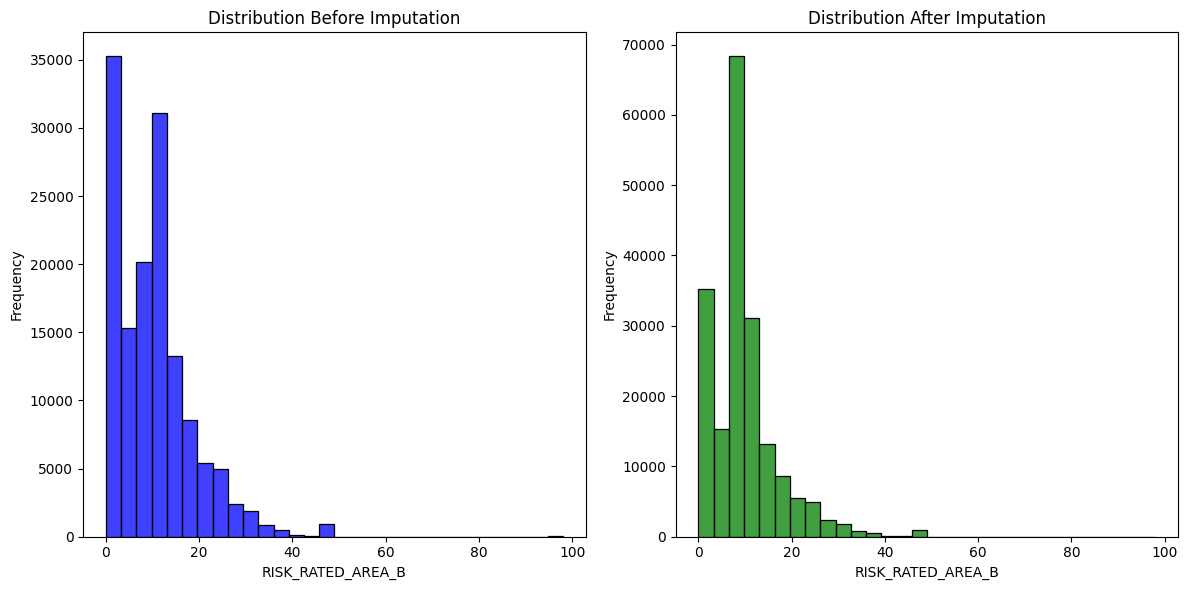

In [19]:
# Plot the distribution before imputation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['RISK_RATED_AREA_B'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribution Before Imputation')
plt.xlabel('RISK_RATED_AREA_B')
plt.ylabel('Frequency')

# Perform your imputation here
median_risk_b = data['RISK_RATED_AREA_B'].median()
data['RISK_RATED_AREA_B'].fillna(median_risk_b, inplace=True)

# Plot the distribution after imputation
plt.subplot(1, 2, 2)
sns.histplot(data['RISK_RATED_AREA_B'].dropna(), bins=30, kde=False, color='green')
plt.title('Distribution After Imputation')
plt.xlabel('RISK_RATED_AREA_B')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

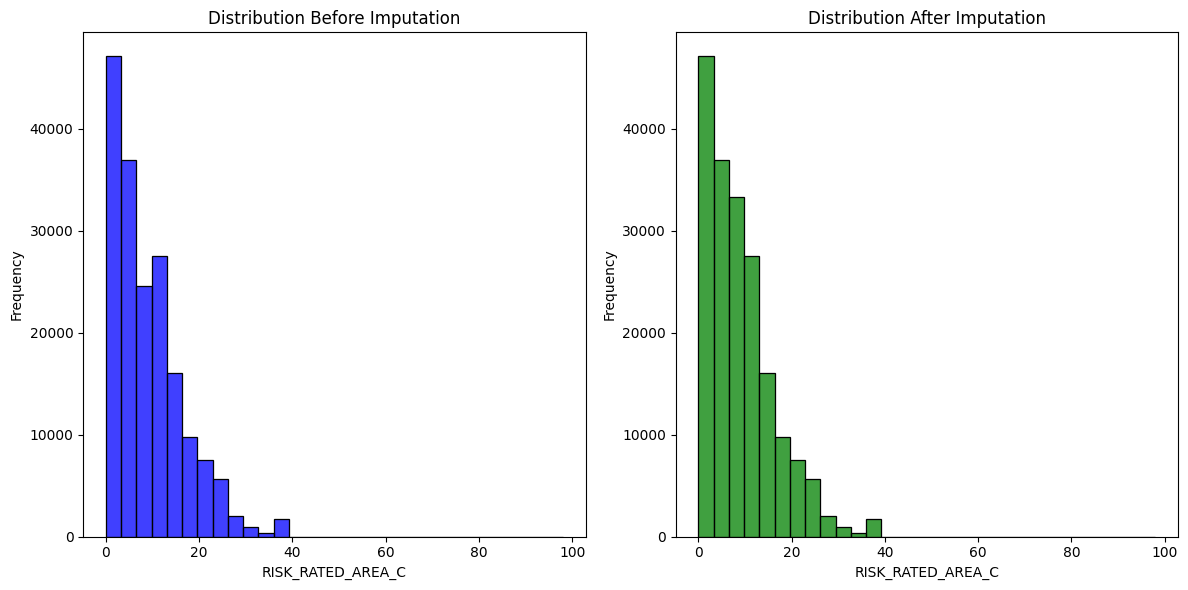

In [20]:
# Plot the distribution before imputation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['RISK_RATED_AREA_C'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribution Before Imputation')
plt.xlabel('RISK_RATED_AREA_C')
plt.ylabel('Frequency')

# Perform your imputation here
median_risk_c = data['RISK_RATED_AREA_C'].median()
data['RISK_RATED_AREA_C'].fillna(median_risk_c, inplace=True)

# Plot the distribution after imputation
plt.subplot(1, 2, 2)
sns.histplot(data['RISK_RATED_AREA_C'].dropna(), bins=30, kde=False, color='green')
plt.title('Distribution After Imputation')
plt.xlabel('RISK_RATED_AREA_C')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Handling Missing values for QUOTE_DATE

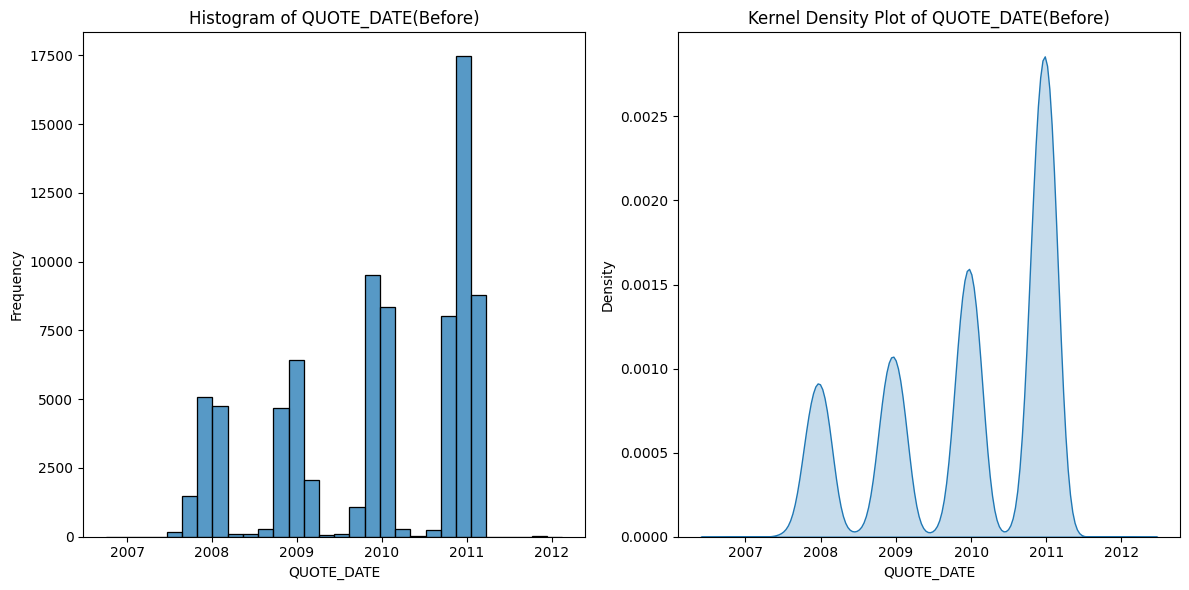

In [21]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['QUOTE_DATE'], bins=30, kde=False)
plt.title('Histogram of QUOTE_DATE(Before)')
plt.xlabel('QUOTE_DATE')
plt.ylabel('Frequency')

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data['QUOTE_DATE'], fill=True)
plt.title('Kernel Density Plot of QUOTE_DATE(Before)')
plt.xlabel('QUOTE_DATE')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [22]:
data['QUOTE_DATE'] = data['QUOTE_DATE'].ffill()

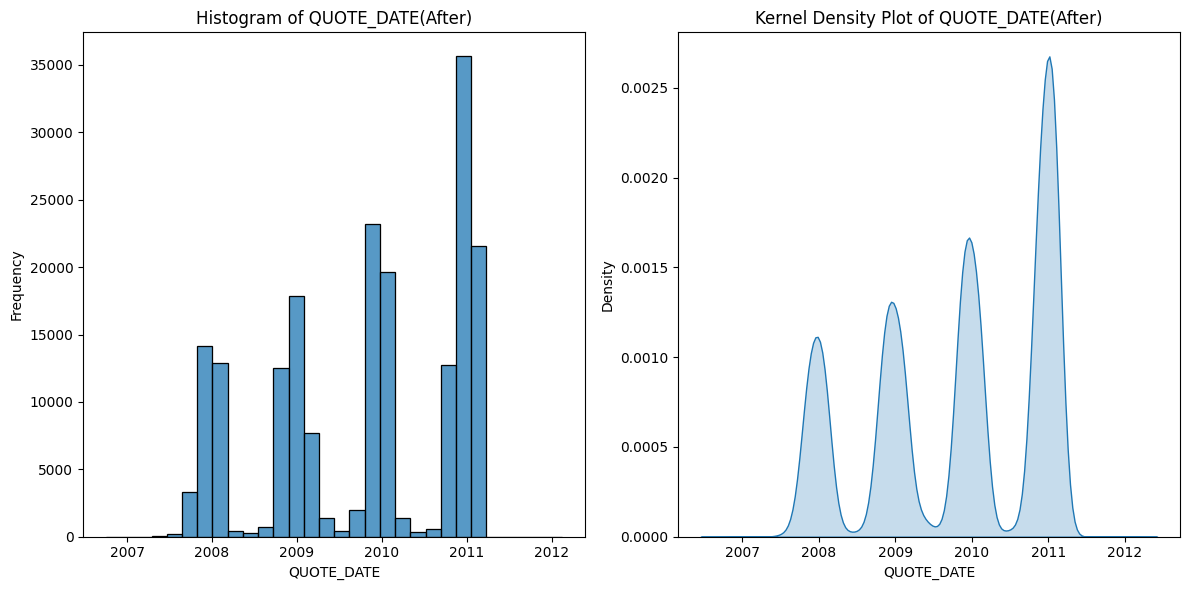

In [23]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['QUOTE_DATE'], bins=30, kde=False)
plt.title('Histogram of QUOTE_DATE(After)')
plt.xlabel('QUOTE_DATE')
plt.ylabel('Frequency')

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data['QUOTE_DATE'], fill=True)
plt.title('Kernel Density Plot of QUOTE_DATE(After)')
plt.xlabel('QUOTE_DATE')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189021 entries, 0 to 256135
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     189021 non-null  int64         
 1   POLICY_NUM             189021 non-null  object        
 2   QUOTE_DATE             189021 non-null  datetime64[ns]
 3   COVER_START            189021 non-null  datetime64[ns]
 4   P1_EMP_STATUS          189021 non-null  object        
 5   BUS_USE                189021 non-null  object        
 6   AD_BUILDINGS           189021 non-null  object        
 7   RISK_RATED_AREA_B      189021 non-null  float64       
 8   SUM_INSURED_BUILDINGS  189021 non-null  float64       
 9   NCD_GRANTED_YEARS_B    189021 non-null  float64       
 10  AD_CONTENTS            189021 non-null  object        
 11  RISK_RATED_AREA_C      189021 non-null  float64       
 12  SUM_INSURED_CONTENTS   189021 non-null  float64  

In [25]:
data.isnull().sum()

,0
ID,0
POLICY_NUM,0
QUOTE_DATE,0
COVER_START,0
P1_EMP_STATUS,0
BUS_USE,0
AD_BUILDINGS,0
RISK_RATED_AREA_B,0
SUM_INSURED_BUILDINGS,0
NCD_GRANTED_YEARS_B,0


#### Dropping rows from col 'ANNUAL PREMIUM' having less than 0 or 0

In [26]:
data = data[data['ANNUAL_PREMIUM'] > 0]

In [27]:
data.shape

(188988, 42)

#### Creating New Features - Client Age - 'AGE' and Property Age - 'PROPERTY_AGE'

In [28]:
# Calculate age
data['AGE'] = ((data['COVER_START'] - data['P1_DOB']) / pd.Timedelta(days=365.25)).astype(int)

# Calculate property age
data['PROPERTY_AGE'] = (data['COVER_START'] - data['YEARBUILT']).dt.days // 365

# Display the updated DataFrame
print(data[['P1_DOB', 'COVER_START', 'YEARBUILT', 'AGE', 'PROPERTY_AGE']])

           P1_DOB COVER_START  YEARBUILT  AGE  PROPERTY_AGE
0      1939-06-15  2007-11-22 1960-01-01   68            47
1      1970-05-20  2008-01-01 1960-01-01   37            48
2      1947-06-10  2007-11-23 1946-01-01   60            61
3      1925-12-16  2007-12-12 1870-01-01   81           138
4      1936-02-11  2007-12-15 1960-01-01   71            47
...           ...         ...        ...  ...           ...
256131 1937-02-15  2005-02-22 1980-01-01   68            25
256132 1928-04-24  2000-12-01 1980-01-01   72            20
256133 1945-05-06  2006-01-18 1900-01-01   60           106
256134 1937-04-03  2004-12-31 1900-01-01   67           105
256135 1949-12-26  2006-12-09 1946-01-01   56            60

[188988 rows x 5 columns]


#### Extract year, month, and day from date columns

In [29]:
data['QUOTE_YEAR'] = data['QUOTE_DATE'].dt.year
data['QUOTE_MONTH'] = data['QUOTE_DATE'].dt.month
data['COVER_START_YEAR'] = data['COVER_START'].dt.year
data['COVER_START_MONTH'] = data['COVER_START'].dt.month

# Drop original date columns
data = data.drop(['QUOTE_DATE', 'COVER_START'], axis=1)
data = data.drop(['P1_DOB'], axis=1)

In [30]:
data['Year_of_Construction'] = data['YEARBUILT'].dt.year
data = data.drop('YEARBUILT', axis=1)

#### Converting columns having Y to 1 and N to 0

In [31]:
cols_to_replace = ['BUS_USE', 'AD_BUILDINGS', 'AD_CONTENTS', 'CONTENTS_COVER', 'BUILDINGS_COVER',
                   'P1_POLICY_REFUSED', 'APPR_ALARM', 'APPR_LOCKS', 'FLOODING', 'NEIGH_WATCH',
                   'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE']


data[cols_to_replace] = data[cols_to_replace].replace({'Y': 1, 'N': 0})

#### Moving target variable at the end of dataframe

In [32]:
data = data[[col for col in data.columns if col != 'ANNUAL_PREMIUM'] + ['ANNUAL_PREMIUM']]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188988 entries, 0 to 256135
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     188988 non-null  int64  
 1   POLICY_NUM             188988 non-null  object 
 2   P1_EMP_STATUS          188988 non-null  object 
 3   BUS_USE                188988 non-null  int64  
 4   AD_BUILDINGS           188988 non-null  int64  
 5   RISK_RATED_AREA_B      188988 non-null  float64
 6   SUM_INSURED_BUILDINGS  188988 non-null  float64
 7   NCD_GRANTED_YEARS_B    188988 non-null  float64
 8   AD_CONTENTS            188988 non-null  int64  
 9   RISK_RATED_AREA_C      188988 non-null  float64
 10  SUM_INSURED_CONTENTS   188988 non-null  float64
 11  NCD_GRANTED_YEARS_C    188988 non-null  float64
 12  CONTENTS_COVER         188988 non-null  int64  
 13  BUILDINGS_COVER        188988 non-null  int64  
 14  SPEC_SUM_INSURED       188988 non-null  f

# Exploratory Data Analysis(EDA)

#### Univariate Analysis

In [34]:
data.nunique()

,0
ID,188988
POLICY_NUM,188988
P1_EMP_STATUS,11
BUS_USE,2
AD_BUILDINGS,2
RISK_RATED_AREA_B,54
SUM_INSURED_BUILDINGS,2
NCD_GRANTED_YEARS_B,10
AD_CONTENTS,2
RISK_RATED_AREA_C,49


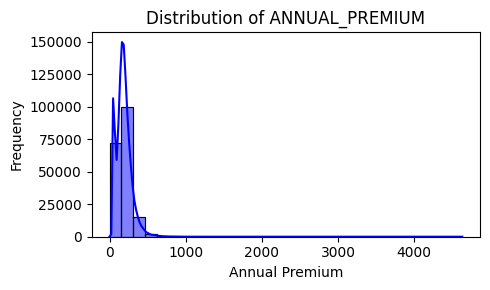

In [35]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

# Plot histogram for ANNUAL_PREMIUM
sns.histplot(data['ANNUAL_PREMIUM'], bins=30, kde=True, color='Blue')
axes.set_title('Distribution of ANNUAL_PREMIUM')
axes.set_xlabel('Annual Premium')
axes.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

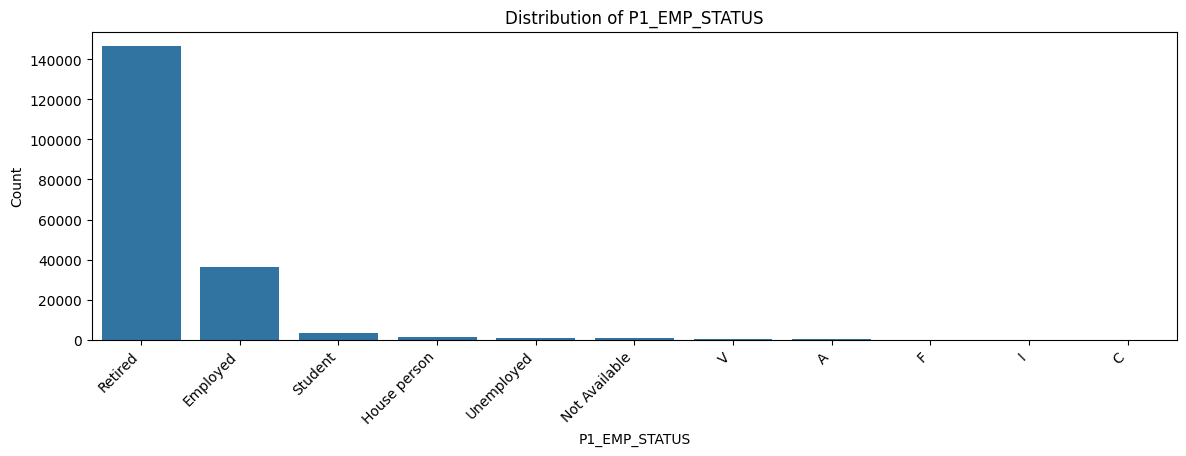

In [36]:
# Mapping dictionary
emp_status_labels = {
    'R': 'Retired',
    'E': 'Employed',
    'N': 'Not Available',
    'H': 'House person',
    'S': 'Student',
    'U': 'Unemployed',
    'A': 'A',
    'F': 'F',
    'I': 'I',
    'V': 'V',
    'C': 'C',
}

# Create the count plot with the mapped labels
plt.figure(figsize=(14, 4))
sns.countplot(x=data['P1_EMP_STATUS'].map(emp_status_labels), order=data['P1_EMP_STATUS'].map(emp_status_labels).value_counts().index)
plt.xlabel('P1_EMP_STATUS')
plt.ylabel('Count')
plt.title('Distribution of P1_EMP_STATUS')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

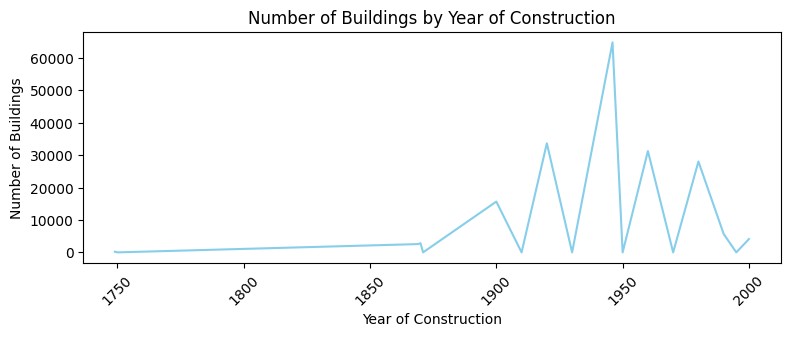

In [37]:
buildings_by_year = data.groupby(data['Year_of_Construction']).size()
# Plotting the results
plt.figure(figsize=(9, 3))
buildings_by_year.plot(kind='line', color='skyblue')
plt.xlabel('Year of Construction')
plt.ylabel('Number of Buildings')
plt.title('Number of Buildings by Year of Construction')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

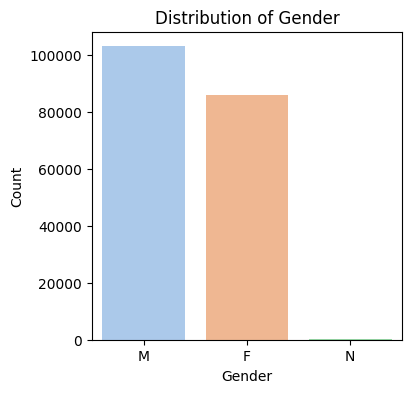

In [38]:
plt.figure(figsize=(4, 4))
sns.countplot(x='P1_GENDER', data=data, order=['M', 'F', 'N'], palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

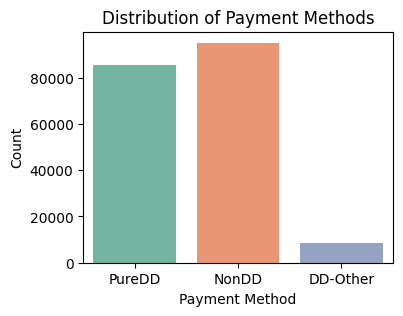

In [39]:
plt.figure(figsize=(4, 3))
sns.countplot(x='PAYMENT_METHOD', data=data, palette='Set2')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods')
plt.show()

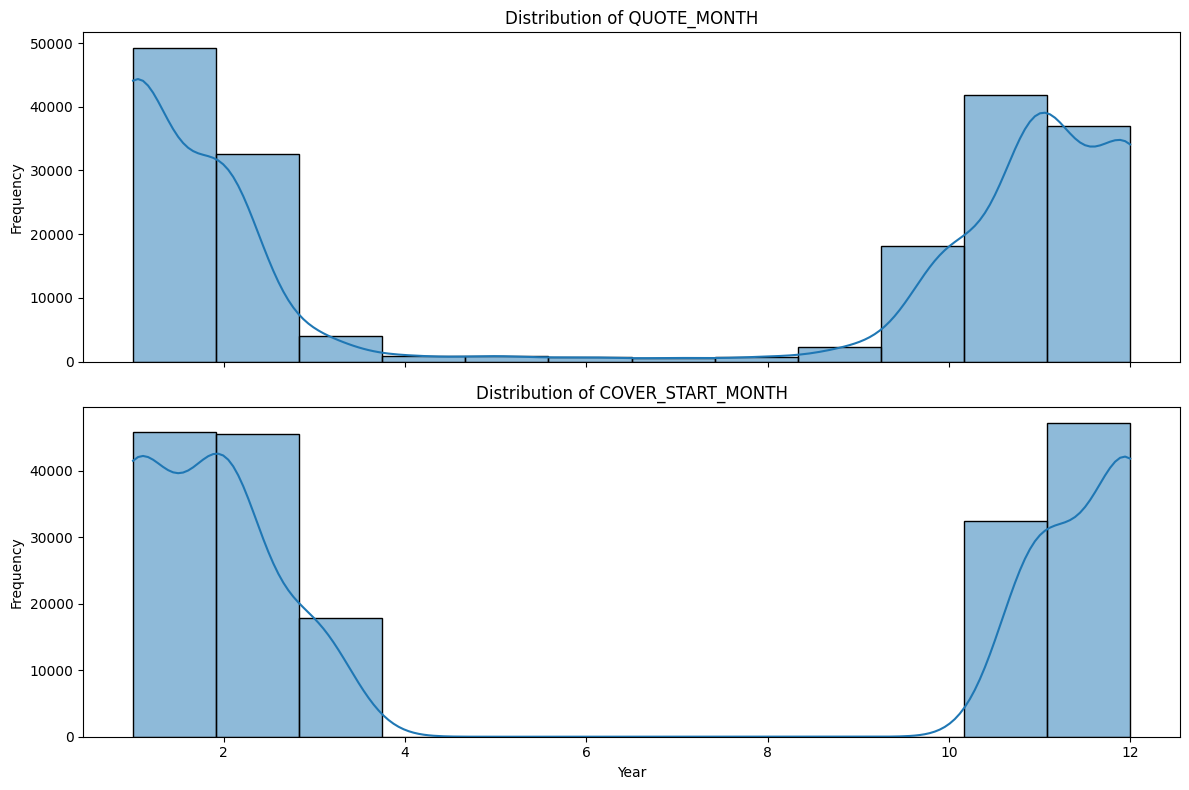

In [40]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Plot histogram for QUOTE_YEAR
sns.histplot(data['QUOTE_MONTH'], bins=12, kde=True, ax=axes[0])
axes[0].set_title('Distribution of QUOTE_MONTH')
axes[0].set_ylabel('Frequency')

# Plot histogram for COVER_START_YEAR
sns.histplot(data['COVER_START_MONTH'], bins=12, kde=True, ax=axes[1])
axes[1].set_title('Distribution of COVER_START_MONTH')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#### Bivariate Analysis

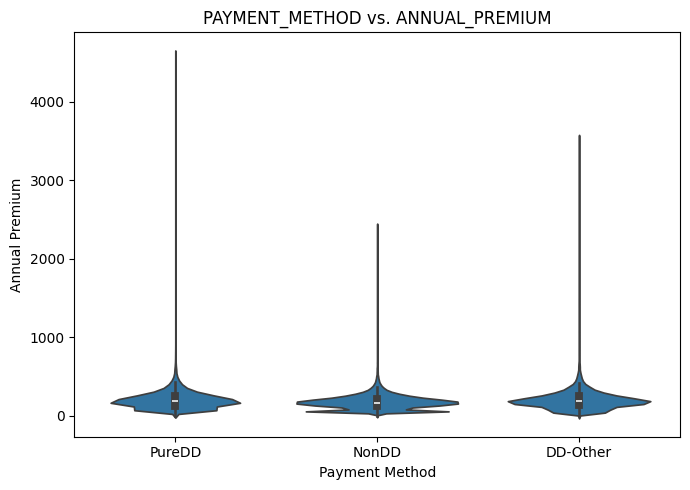

In [41]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Violin plot for PAYMENT_METHOD vs. ANNUAL_PREMIUM
sns.violinplot(x='PAYMENT_METHOD', y='ANNUAL_PREMIUM', data=data, ax=ax)
ax.set_title('PAYMENT_METHOD vs. ANNUAL_PREMIUM')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Annual Premium')

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 900x1000 with 0 Axes>

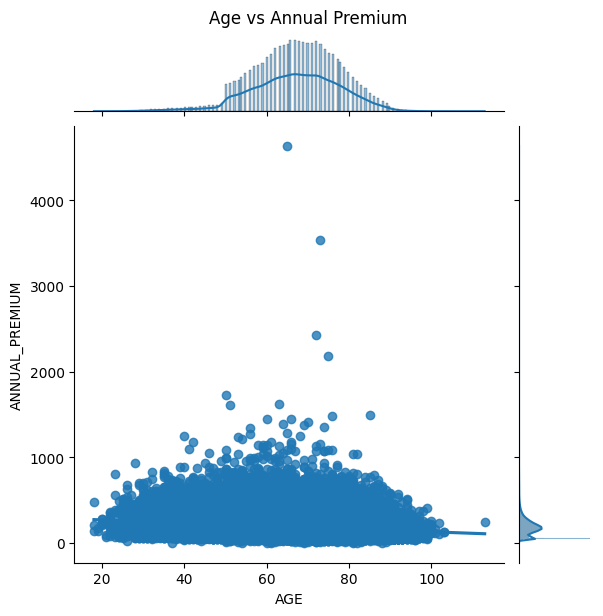

In [42]:
plt.figure(figsize=(9, 10))

# Joint plot with regression line
sns.jointplot(x='AGE', y='ANNUAL_PREMIUM', kind='reg', data=data)
plt.suptitle('Age vs Annual Premium', y=1.02)

plt.show()

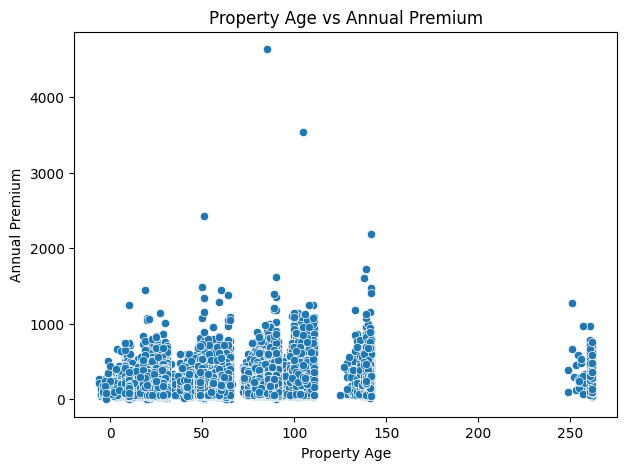

In [43]:
plt.figure(figsize=(7, 5))

# Scatter plot with color-coded points based on PAYMENT_METHOD
sns.scatterplot(x='PROPERTY_AGE', y='ANNUAL_PREMIUM', data=data, palette='viridis')
plt.title('Property Age vs Annual Premium')
plt.xlabel('Property Age')
plt.ylabel('Annual Premium')

plt.show()

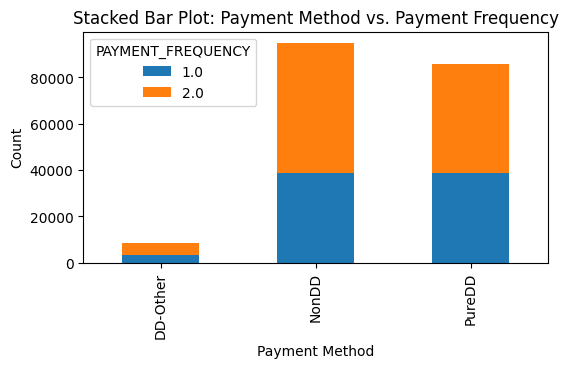

In [44]:
selected_data = data[['PAYMENT_METHOD', 'PAYMENT_FREQUENCY']]
contingency_table = pd.crosstab(selected_data['PAYMENT_METHOD'], selected_data['PAYMENT_FREQUENCY'])

# Plot a stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Payment Method vs. Payment Frequency')
plt.show()

#### Multivariate Analysis

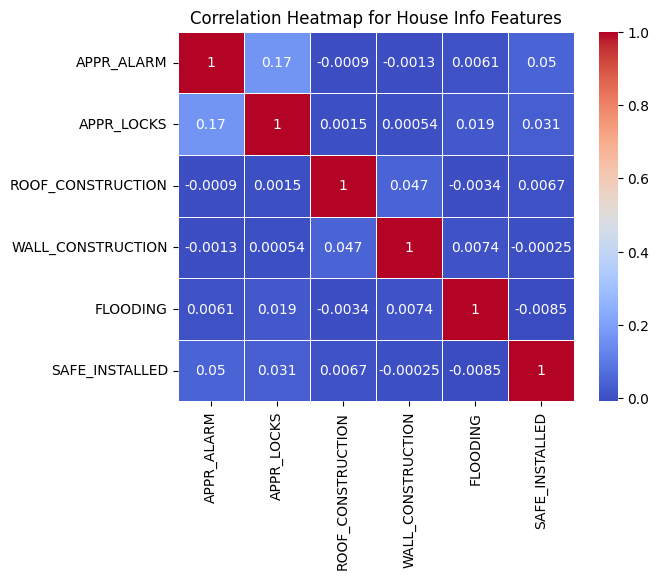

In [45]:
house_info_corr = data[['APPR_ALARM', 'APPR_LOCKS', 'ROOF_CONSTRUCTION', 'WALL_CONSTRUCTION', 'FLOODING', 'SAFE_INSTALLED']].corr()
sns.heatmap(house_info_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for House Info Features')
plt.show()

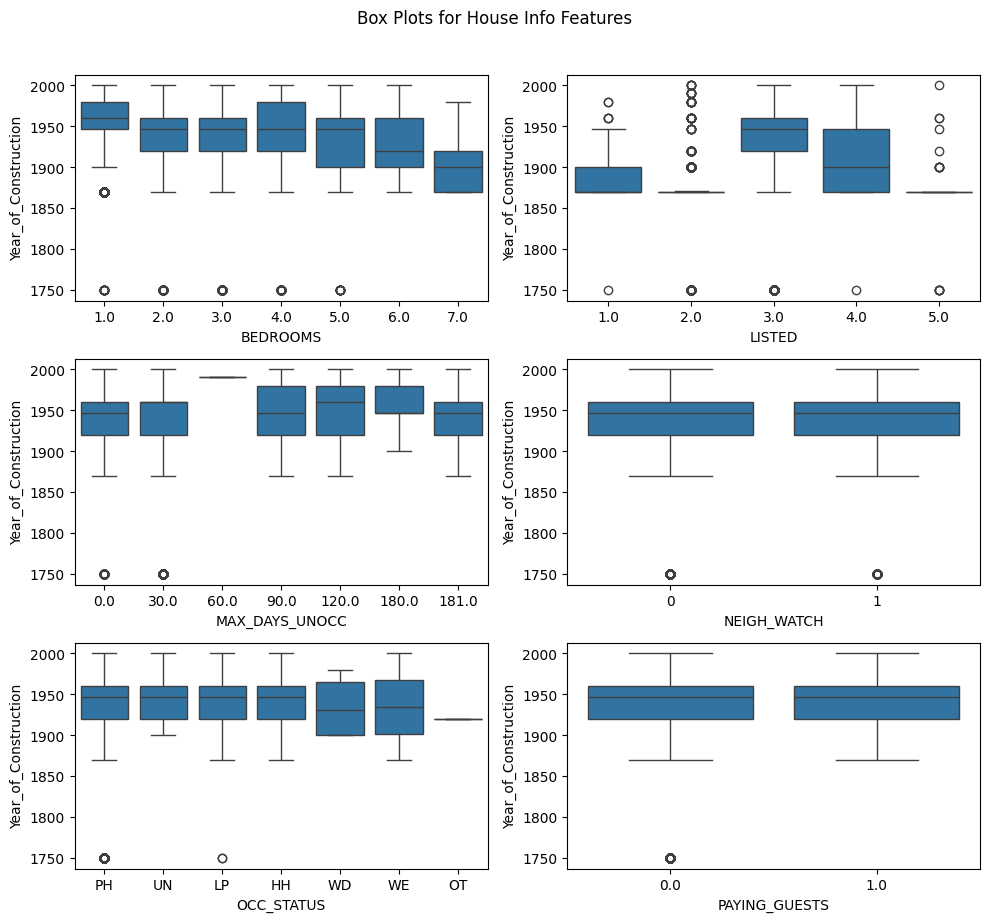

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))
columns = ['BEDROOMS', 'LISTED', 'MAX_DAYS_UNOCC', 'NEIGH_WATCH', 'OCC_STATUS','PAYING_GUESTS']

for i, col in enumerate(columns):
    sns.boxplot(x=col, y='Year_of_Construction', data=data, ax=axes[i // 2, i % 2])

plt.suptitle('Box Plots for House Info Features', y=1.02)
plt.tight_layout()
plt.show()

# Model Training

In [47]:
X = data.iloc[:,2:].drop('ANNUAL_PREMIUM', axis = 1)
y = data['ANNUAL_PREMIUM']

#### Encoding the Categorical Variables

In [48]:
# columns to encode
cols_to_encode = ['OCC_STATUS','P1_EMP_STATUS', 'P1_MAR_STATUS', 'P1_GENDER', 'PAYMENT_METHOD']

# Perform one-hot encoding for each column
for col in cols_to_encode:
    # Create dummy variables
    dummies = pd.get_dummies(data[col], prefix=col)

    # Drop the original column from the DataFrame
    X = X.drop(col, axis=1)

    # Concatenate the dummy variables with the original DataFrame
    X = pd.concat([X, dummies], axis=1)

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188988 entries, 0 to 256135
Data columns (total 71 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BUS_USE                  188988 non-null  int64  
 1   AD_BUILDINGS             188988 non-null  int64  
 2   RISK_RATED_AREA_B        188988 non-null  float64
 3   SUM_INSURED_BUILDINGS    188988 non-null  float64
 4   NCD_GRANTED_YEARS_B      188988 non-null  float64
 5   AD_CONTENTS              188988 non-null  int64  
 6   RISK_RATED_AREA_C        188988 non-null  float64
 7   SUM_INSURED_CONTENTS     188988 non-null  float64
 8   NCD_GRANTED_YEARS_C      188988 non-null  float64
 9   CONTENTS_COVER           188988 non-null  int64  
 10  BUILDINGS_COVER          188988 non-null  int64  
 11  SPEC_SUM_INSURED         188988 non-null  float64
 12  SPEC_ITEM_PREM           188988 non-null  float64
 13  P1_POLICY_REFUSED        188988 non-null  int64  
 14  APPR_ALAR

#### Standardizing the Numerical features

In [50]:
from sklearn.preprocessing import StandardScaler

# Assuming df contains your dataset with numerical features
numerical_cols =X.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform them
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#### Split the Train and Test Data

In [51]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (151190, 71)
Shape of X_test: (37798, 71)
Shape of y_train: (151190,)
Shape of y_test: (37798,)


#### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import necessary metrics

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE with squared=True (default)
rmse = mse**0.5  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Decision Tree Metrics:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Decision Tree Metrics:
Mean Absolute Error: 45.976670591036566
Mean Squared Error: 5614.989590301736
Root Mean Squared Error: 74.93323421754687
R^2 Score: 0.44804350942110804


#### Support Vector Regression

In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor model
svr_model = SVR(kernel='rbf')

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svr = svr_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression (SVR) Metrics:")
print("Mean Absolute Error:", mae_svr)
print("Mean Squared Error:", mse_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R^2 Score:", r2_svr)

#### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Metrics:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R^2 Score:", r2_gb)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Metrics:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R^2 Score:", r2_rf)

#### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Metrics:")
print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R^2 Score:", r2_xgb)

XGBoost Cross validation and HyperParameter Tuning

In [ ]:
# Fine tune
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.2],
    'subsample': [0.6, 1.0],
    'colsample_bytree': [0.6, 1.0],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [0.1, 1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_


In [ ]:
# Make predictions on the testing data using the best model
y_pred_xgb_cv = best_xgb_model.predict(X_test)

# Evaluate the model
mae_xgb_cv = mean_absolute_error(y_test, y_pred_xgb_cv)
mse_xgb_cv = mean_squared_error(y_test, y_pred_xgb_cv)
rmse_xgb_cv = mean_squared_error(y_test, y_pred_xgb_cv, squared=False)
r2_xgb_cv = r2_score(y_test, y_pred_xgb_cv)

print("XGBoost Regression Metrics after Cross-Validation and Hyperparameter Tuning:")
print("Mean Absolute Error:", mae_xgb_cv)
print("Mean Squared Error:", mse_xgb_cv)
print("Root Mean Squared Error:", rmse_xgb_cv)
print("R^2 Score:", r2_xgb_cv)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


#### LightGBM

In [ ]:
import lightgbm as lgb

# Initialize the LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Regression Metrics:")
print("Mean Absolute Error:", mae_lgb)
print("Mean Squared Error:", mse_lgb)
print("Root Mean Squared Error:", rmse_lgb)
print("R^2 Score:", r2_lgb)

Cross Validation and HyperParameter Tuning

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

print("Starting Cross-Validation and Hyperparameter Tuning for LightGBM...")

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_lgb_model = grid_search.best_estimator_

print("Cross-Validation and Hyperparameter Tuning completed.")


In [ ]:
# Make predictions on the testing data using the best model
y_pred_lgb_cv = best_lgb_model.predict(X_test)

# Evaluate the model
mae_lgb_cv = mean_absolute_error(y_test, y_pred_lgb_cv)
mse_lgb_cv = mean_squared_error(y_test, y_pred_lgb_cv)
rmse_lgb_cv = mean_squared_error(y_test, y_pred_lgb_cv, squared=False)
r2_lgb_cv = r2_score(y_test, y_pred_lgb_cv)

print("LightGBM Regression Metrics after Cross-Validation and Hyperparameter Tuning:")
print("Mean Absolute Error:", mae_lgb_cv)
print("Mean Squared Error:", mse_lgb_cv)
print("Root Mean Squared Error:", rmse_lgb_cv)
print("R^2 Score:", r2_lgb_cv)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Model Evaluation

In [ ]:
# Models
models = ['LightGBM', 'XGBoost', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'SVR']

# Metrics
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score']

# Performance values
values = np.array([
    [30.643454251593404, 2807.8690764830253, 52.989329836138005, 0.723984962654707],  # XGBoost
    [30.99884619637846, 2859.4680160775565, 53.473993829501424, 0.7189127591967734],  # LightGBM
    [32.66378544576558, 3096.662352270961, 55.64766259485623, 0.6955964286346243],     # Random Forest
    [33.825996107574554, 3202.5792041969717, 56.59133506286074, 0.6851847452393032],   # Gradient Boosting
    [35.627955176018126, 3935.773204935555, 62.73574104874792, 0.6131113814239629],      # SVR
    [45.996229826974975, 5619.732274216229, 74.96487360234944, 0.44757730104667226],    # Decision Tree

])

# Create a DataFrame for visualization
df = pd.DataFrame(values, columns=metrics, index=models)

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Define a color palette
colors = sns.color_palette('viridis', n_colors=len(models))

# Iterate over each metric and plot
for i, metric in enumerate(metrics):
    # Line plot for the current metric
    for j, model in enumerate(models):
        sns.lineplot(x=models, y=df[metric], markers=True, marker='o', color=colors[j], ax=axes[i])
        # Add values to the line plot
        for x, y in zip(models, df[metric]):
            axes[i].text(x, y, f'{y:.2f}', ha='center', va='bottom')

    # Customize the plot
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(models, rotation=45)
    axes[i].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create the heatmap with annotations formatted as decimal
sns.heatmap(data=df, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5, linecolor='gray', cbar=True)

# Customize the plot
plt.title('Performance Metrics Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tick_params(axis='both', labelsize=10)
plt.tight_layout()

# Show plot
plt.show()